In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import nltk

from os import path
from matplotlib import pyplot as plt

from nltk import word_tokenize, corpus
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer

data_dir = path.join('..', 'data')
img_dir = path.join(data_dir, 'img')
temp_dir = path.join(data_dir, 'temp')

dataset_file = 'merged_data4.csv'

data = pd.read_csv(path.join(data_dir, dataset_file), sep='`')
data = data.sort_values(by=['timestamp'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38908 entries, 0 to 38907
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             38908 non-null  object 
 1   score                             38908 non-null  int64  
 2   id                                38908 non-null  object 
 3   url                               38908 non-null  object 
 4   comms_num                         38908 non-null  int64  
 5   created                           38908 non-null  float64
 6   body                              20703 non-null  object 
 7   timestamp                         38908 non-null  object 
 8   upvote_ratio                      38908 non-null  float64
 9   is_oc                             38908 non-null  bool   
 10  permalink                         38908 non-null  object 
 11  name                              38908 non-null  object 
 12  is_s

In [32]:
def plot_word_cloud(tokens: list, name: str):
    cloud_string = ''
    
    for token_list in tokens:
        for token in token_list:
            token = process_token(token)
            cloud_string += token + ''
            
    cloud = WordCloud(background_color='white').generate(cloud_string)
    
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(name, fontsize=20)
    
    plt.tight_layout()
    plt.show()
    
def process_token(token: str):
    token = token.replace('\'', '').replace('[', '').replace(']', '')
    return token if token != 'nan' else ''


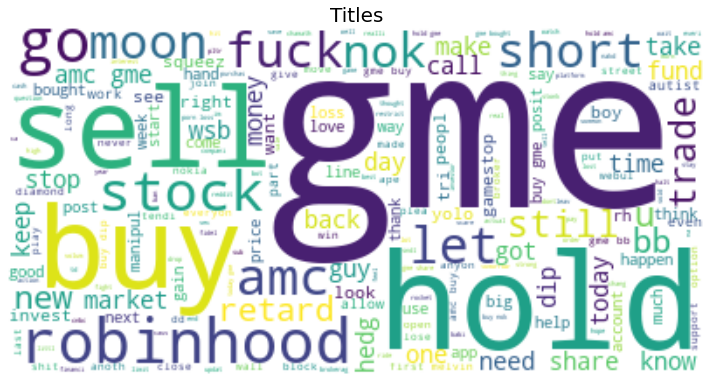

In [20]:
plot_word_cloud(data.title_tokens.values, 'Titles')

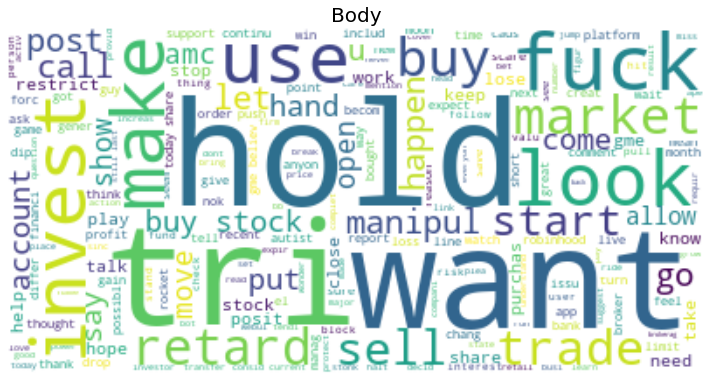

In [33]:
plot_word_cloud(data.body_tokens.values, 'Body')

In [68]:
def get_sentiment(df: pd.DataFrame, column:str, new_column_name: str, verbose=True):
    sia = SentimentIntensityAnalyzer() 
    df[new_column_name] = df[column].apply(lambda x: sia.polarity_scores(x)["compound"])
    
    if verbose:
        verbose_sentiment(df, new_column_name)
        
    return df

def verbose_sentiment(df: pd.DataFrame, column: str, tresh=0.2):
    positive = df[df[column] > tresh].shape[0]
    negative = df[df[column] < -tresh].shape[0]
    
    print('\n' + column + '\n')
    print('Positive: ', positive)
    print('Negative: ', negative)
    print('Neutral: ', df.shape[0] - (positive+negative))

In [69]:
data.body = data.body.apply(lambda x: x if type(x) != float else '')

data = get_sentiment(data, 'title', 'title_sentiment')
data = get_sentiment(data, 'body', 'body_sentiment')


title_sentiment

Positive:  9410
Negative:  8386
Neutral:  21112

body_sentiment

Positive:  8374
Negative:  6013
Neutral:  24521


In [70]:
data.to_csv(path.join(data_dir, 'merged_data4_with_sentiment.csv'), index=False)